# Housing Price Model - Regression Analysis

Author: **Paul A. Beata**  
GitHub: [pbeata](https://github.com/pbeata)

----

_The original data set comes from the [Ames, Iowa housing data](https://www.kaggle.com/marcopale/housing) on Kaggle._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

### Load the Processed Data

In the data preprocessing notebook, we took care of the outliers, missing values, and categorical data in order to prepare our data set for these machine learning models.

In [3]:
df = pd.read_csv('./data_processed/Ames_Housing_Data_Clean_Dummies.csv')
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [4]:
# confirm that there are no missing values
df.isnull().sum().sort_values().max()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [6]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=274)

### Split the Data for Training and Testing

In [7]:
# X: features and y: target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [8]:
# withhold 10% of the data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

Scale the features using the standard scaler (we do not need to scale the targets):

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_test_scaled = scaler.transform(X_test)

### Model 1: Linear Regression using Elastic Net

Combination of Ridge + Lasso Regression

In [41]:
from sklearn.linear_model import ElasticNet

In [49]:
base_model = ElasticNet()

We will use a grid search to find the best alpha values and the L1-ratio for the Elastic Net model.

In [50]:
alpha_values = []

for n in range(-2, 10, 1):
    alpha = 2 ** n
    alpha_values.append(alpha)

alpha_values

[0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

In [51]:
l1_ratio_values = [.1, .5, .9, .95, .99, 1.0]

In [52]:
param_grid = {'alpha': alpha_values,
              'l1_ratio': l1_ratio_values}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# for the grid search, we choose the scoring metric to be the mean squared error in this case
grid = GridSearchCV(estimator=base_model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    cv=5)

In [56]:
# fit the model using the training data
output_warnings = grid.fit(X_train, y_train);

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 716440645740.9347, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742561870310.6692, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818655118539.1367, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913429854109.44, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 890921926867.997, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 853215372200.2468, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\skle

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 942309392452.272, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793074022077.6157, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 813537232809.8983, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 898799573433.8187, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996125115888.3553, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970244516530.3763, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\s

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049042238309.2212, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 992130265141.8177, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598084823607.6685, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664786187982.4379, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634434587488.2823, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735836732328.164, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\s

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464914355976.277, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389407334136.71906, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492426074808.02637, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275254716242.3552, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1242856142015.003, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187391331959.0767, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(
C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages

KeyboardInterrupt: 

In [21]:
grid.best_params_

{'alpha': 16, 'l1_ratio': 1.0}

The best parameters found during the grid search using the mean squared error as our metric are the following (hyperparameters):

$\alpha = 16$

$L_{ratio}^1 = 1.0$

Since we explored alpha values of 8, 16, and 32, we can try to focus on this range of [8, 32] to see if there is a better alpha that we missed:

In [22]:
new_l1_ratio_values = [.9, .95, .99, 1.0]
new_alpha_values = np.arange(8, 33, 2)

In [23]:
new_param_grid = {'alpha': new_alpha_values,
                  'l1_ratio': new_l1_ratio_values}

In [28]:
new_base_model = ElasticNet()
new_grid = GridSearchCV(estimator=new_base_model,
                        param_grid=new_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=2)

In [29]:
new_grid.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664786187982.4379, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634434587488.2823, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735836732328.164, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717942371495.6206, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608136166911.5813, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418621791410.65564, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342605489519.76843, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445442611924.799, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433990313331.1874, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321346097736.02155, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.3s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278218755255.8526, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.3s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.1s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337458205769.1549, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685508995305.9323, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 655521602207.718, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757727991905.2769, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739111770260.2046, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627015149314.0085, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433585299993.0091, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357542849702.2823, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460830441087.1433, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448999414031.8262, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332148272253.08765, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221532815556.47043, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=1.0; total time=   0.3s
[CV] END .............................alpha=10, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=10, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175835884304.6772, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701681980816.9453, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671969181362.5261, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774674569782.0378, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755516737697.8171, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641904172645.9302, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445871893303.3675, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369949480222.30585, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473298392008.03357, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461173618711.2193, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341266728618.92316, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714655442984.484, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685143545979.979, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788165642345.505, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768594000107.0034, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653935388317.2412, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456161574490.229, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380434285764.02405, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483671911502.03925, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471263981585.3823, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349115404385.05994, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725279053175.1716, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695913038083.772, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799133855298.6394, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779236495832.1782, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663834662919.3665, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464914355976.277, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389407334136.71906, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492426074808.02637, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479754607648.5721, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355935284311.04553, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.3s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734112193045.8467, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 704832346445.0581, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 808201804472.9677, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788046232364.6165, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672094196229.7571, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472435221862.7893, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397156762272.2815, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499891310795.16785, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486978570232.0341, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361910048165.4874, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=18, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=18, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=18, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=18, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=18, l1_ratio=1.0; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741552156464.3888, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712320177775.3374, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 815800894875.3009, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795435187772.602, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679061937277.6241, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478966591746.9789, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403903240384.8687, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506313994605.3892, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493188468724.5795, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367177882021.0077, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=20, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=20, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=20, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=20, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 747886039665.096, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718672184682.4326, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 822220960124.4805, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801683863527.4916, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684991890261.4104, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484678318655.48047, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409814350144.9557, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511880407353.2757, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498564929896.06616, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371845782427.0448, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=22, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=22, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=22, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=22, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=22, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753324989961.1138, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724112150975.1445, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827697835556.8778, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 807019556720.6278, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690074462979.8518, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489702686616.4783, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415016239322.28864, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516733633228.07837, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503250332197.701, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375998370252.06995, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=24, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=24, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=24, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=24, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=24, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758032845435.9791, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728793659557.6989, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832402823229.4955, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811613048709.0248, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 694455696337.6937, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494151018154.2243, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419614266631.9477, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520985711191.05255, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507358179876.87134, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379704867650.79443, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=26, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=26, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=26, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=26, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=26, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762132569717.4592, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732844557981.0322, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 836471759485.703, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 815577276185.4133, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698249043828.739, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498102409117.4171, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423715287864.7682, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524725865902.90283, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510970662679.35455, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383022089270.1826, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.6s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=28, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=28, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=28, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=28, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=28, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765716788287.7736, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736360677539.6583, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 840005730401.5388, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 819018153876.9548, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701544475374.3324, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 501628893397.226, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427368747181.8229, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528026534387.9383, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514161535378.91626, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385997007469.5862, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=30, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=30, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=30, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768863049012.2845, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739427666852.7379, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843083124938.6581, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 822016210067.9722, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 704414235881.3082, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504785893963.6347, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430621138104.3981, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530946074005.8925, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516983312776.9459, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388669248588.2582, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.7s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.1s


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
                         'l1_ratio': [0.9, 0.95, 0.99, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [30]:
new_grid.best_params_

{'alpha': 14, 'l1_ratio': 1.0}

Therefore, we will use an alpha value of either 14 or 16 in the elastic net regression model. The alpha is simply a constant that multiplies the penalty terms. If we use an alpha of 0, this is equal to normal linear regression.

For reference, the scikit-learn documentation says that the l1_ratio is the "the ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2." Therefore, with an l1_ratio of 1.0, we are using the pure L1 penalty method (Lasso).

#### Elastic Net Model Predictions

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
# alpha = 16
y_pred = grid.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE:  ${round(mae, 2)}')
print(f'RMSE: ${round(rmse, 2)}')

MAE:  $14197.05
RMSE: $20172.62


In [31]:
# alpha = 14
new_pred = new_grid.predict(X_test)
new_mae = mean_absolute_error(y_test, new_pred)
new_rmse = np.sqrt(mean_squared_error(y_test, new_pred))

print(f'MAE:  ${round(new_mae, 2)}')
print(f'RMSE: ${round(new_rmse, 2)}')

MAE:  $14216.35
RMSE: $20225.65


In [27]:
# what was the mean sale price in our dataset?
mean_price = np.mean(df['SalePrice'])
print( "Mean Sale Price: $", round(mean_price, 2) )

Mean Sale Price: $ 180815.54


In [32]:
# percent error
print("Elastic Net Percent Error: ")
print("MAE:", round( 100 * (mae / mean_price), 2), "%" )
print("RMSE:", round( 100 * (rmse / mean_price), 2), "%" )

Elastic Net Percent Error: 
MAE: 7.85 %
RMSE: 11.16 %


Plot the predicted values versus the actual known values for the target prices (y_test):

In order to test various models, I created this function so that we can produce the same plot as the one above and automatically compute the mean absolute error and mean squared error:

In [96]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    
    # GET METRICS
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE:  ${round(mae, 2)}')
    print(f'RMSE: ${round(rmse, 2)}')
    
    # PLOT PREDICTIONS VS TARGET
    plt.figure(figsize=(4,4), dpi=100)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='black')
    plt.xticks(rotation=45)
    plt.xlabel('Actual Sale Price (Target)')
    plt.ylabel('Predicted House Value')
#     plt.title('Predicted House Price VS Actual Sale Price', fontsize=12)
    
    # PLOT THE PERFECT RELATIONSHIP LINE
    x_line = [np.min(y_test), np.max(y_test)]
    y_line = [np.min(y_test), np.max(y_test)]
    plt.plot(x_line, y_line, 'r-', label='Ideal Fit')
    plt.legend()
    
    # SAVE THE FIGURE
    plt.tight_layout()
    plt.savefig('linear_house_model_results.png', dpi=200)
    plt.show()

MAE:  $14197.05
RMSE: $20172.62


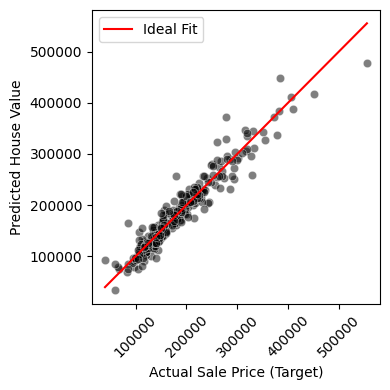

In [99]:
net_model = ElasticNet(alpha=16, l1_ratio=1, max_iter=100000)
run_model(net_model, X_train, y_train, X_test, y_test)

### Model 2: Ordinary Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

MAE:  $14576.7
RMSE: $20849.78


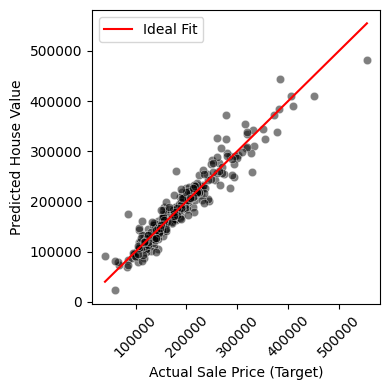

In [98]:
lin_model = LinearRegression()
run_model(lin_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Model 3: Lasso Regression Only

Lasso regularization allows for a sort of "automatic" feature selection as some of the model coefficients could become exactly zero when using Lasso for regression.

In [41]:
from sklearn.linear_model import LassoCV

In [42]:
# use Lasso cross-validation for regression on 10 folds (testing several alpha values)
lasso_model = LassoCV(eps=0.0001, n_alphas=256, cv=10, max_iter=1000000)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(cv=10, eps=0.0001, max_iter=1000000, n_alphas=256)

In [43]:
# the best alpha hyperparameter:
lasso_model.alpha_

108.25071540394585

In [44]:
# here we can clearly see how some of the model coefficients were determined to be zero
lasso_coefs = pd.DataFrame(data=lasso_model.coef_,
                           index=X.columns,
                           columns=['Coefficient'])
lasso_coefs.describe()

,Coefficient
count,273.000000
mean,313.295164
std,2778.847641
min,-10623.600355
25%,-346.885720
50%,0.000000
75%,605.984548
max,28127.643257


In [45]:
# display the coefficients equal to zero only
lasso_coefs[ lasso_coefs['Coefficient'] == 0.0 ]

,Coefficient
Bsmt Unf SF,-0.0
1st Flr SF,0.0
TotRms AbvGrd,0.0
Garage Yr Blt,-0.0
3Ssn Porch,-0.0
...,...
Garage Cond_None,0.0
Garage Cond_TA,0.0
Paved Drive_Y,0.0
Sale Type_VWD,-0.0


**We can see here from the table above that there are 68 coefficients that are equal to zero.** This implies that 68 of the 273 features (which includes the dummy variables created during preprocessing) will not be used in the model predictions.

In [46]:
# check the accuracy of predictions on the TRAINING data
y_pred = lasso_model.predict(X_train_scaled)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

print(f'MAE:  ${round(mae, 2)}')
print(f'RMSE: ${round(rmse, 2)}')

MAE:  $13443.1
RMSE: $19768.42


In [47]:
# check the accuracy of predictions on the TESTING data
y_pred = lasso_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE:  ${round(mae, 2)}')
print(f'RMSE: ${round(rmse, 2)}')

MAE:  $14191.32
RMSE: $20554.11


### Model 4: Ridge Regression Only

In [48]:
from sklearn.linear_model import RidgeCV

In [49]:
ridge_model = RidgeCV(alphas=[1, 2, 4, 8, 16, 32, 64, 128, 256], cv=10)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([  1,   2,   4,   8,  16,  32,  64, 128, 256]), cv=10)

In [50]:
ridge_model.alpha_

64

In [51]:
y_pred = ridge_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE:  ${round(mae, 2)}')
print(f'RMSE: ${round(rmse, 2)}')

MAE:  $14275.03
RMSE: $20866.82


### Model 5: Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
# random forest regressor model with scikit-learn default values: 
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train_scaled, y_train)
rfr_pred = rfr_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
mae = mean_absolute_error(y_test, rfr_pred)

print(f'MAE:  ${round(mae, 2)}')
print(f'RMSE: ${round(rmse, 2)}')

MAE:  $15366.47
RMSE: $21807.27


In [55]:
# CREATE A PARAMETER GRID TO SEARCH FOR THE BEST HYPERPARAMETERS
# Note: this could take a long time depending on your machine's hardware

n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2', 16, 32]
# criterion = ['mse', 'mae']
max_depth = [2, 4, 6, 8, 10, 'None']

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
#               'criterion': criterion,
              'max_depth': max_depth}

In [57]:
rfr_grid = GridSearchCV(rfr_model, param_grid, verbose=2, cv=5)

In [58]:
rfr_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ....max_depth=2, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=2, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=2, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=2, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=2, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=200; total time=   1.2s
[CV] END ...max_depth=2, max_features=auto, n_e

[CV] END ...max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=4, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=4, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=4, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=4, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=4, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=4, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=4, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=4, max

[CV] END .....max_depth=6, max_features=16, n_estimators=100; total time=   0.2s
[CV] END .....max_depth=6, max_features=16, n_estimators=100; total time=   0.2s
[CV] END .....max_depth=6, max_features=16, n_estimators=200; total time=   0.4s
[CV] END .....max_depth=6, max_features=16, n_estimators=200; total time=   0.4s
[CV] END .....max_depth=6, max_features=16, n_estimators=200; total time=   0.4s
[CV] END .....max_depth=6, max_features=16, n_estimators=200; total time=   0.4s
[CV] END .....max_depth=6, max_features=16, n_estimators=200; total time=   0.4s
[CV] END ......max_depth=6, max_features=32, n_estimators=50; total time=   0.1s
[CV] END ......max_depth=6, max_features=32, n_estimators=50; total time=   0.1s
[CV] END ......max_depth=6, max_features=32, n_estimators=50; total time=   0.1s
[CV] END ......max_depth=6, max_features=32, n_estimators=50; total time=   0.1s
[CV] END ......max_depth=6, max_features=32, n_estimators=50; total time=   0.1s
[CV] END .....max_depth=6, m

[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   4.2s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   3.7s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   3.6s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   3.7s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   3.8s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   7.1s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   6.9s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   6.6s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   6.4s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   7.3s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=10, ma

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.0s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=None, max_features=16, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=16, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=16, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=16, n_estimators=50; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END ...max_depth=None, max_features=16, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=100; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END ..max_depth=None, max_features=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=None, max_features=16, n_estimators=200; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END ..max_depth=None, max_features=16, n_estimators=200; total time=   0.0s
[CV] END ...max_depth=None, max_features=32, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=32, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=32, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=32, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=None, max_features=32, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=100; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END ..max_depth=None, max_features=32, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=200; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\job

[CV] END ..max_depth=None, max_features=32, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=None, max_features=32, n_estimators=200; total time=   0.0s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 'None'],
                         'max_features': ['auto', 'sqrt', 'log2', 16, 32],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [59]:
# the best hyperparameters found during the grid search:
rfr_grid.best_estimator_

RandomForestRegressor(max_depth=10, max_features=32, n_estimators=200)

In [60]:
rfr_pred = rfr_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rfr_pred)
rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))

print(f'MAE:  ${round(mae, 2)}')
print(f'RMSE: ${round(rmse, 2)}')

MAE:  $15614.91
RMSE: $21997.33


### Summary of Model Performance

| Model             | MAE       | RMSE      | Notes           |
|:-----             |:-----     |:-----     |:-----           |
|1. Elastic Net     |\\$14,197   |\\$20,172   | Lowest RMSE     |
|2. Linear          |\\$14,577   |\\$20,849   |                 |
|3. Lasso           |\\$14,191   |\\$20,554   | Lowest MAE      |
|4. Ridge           |\\$14,275   |\\$20,867   |                 |
|5. Random Forest   |\\$15,366   |\\$21,807   |                 |

The best regression model in terms of the mean absolute error (using the 10% withheld training split of data) was the Lasso model. The lowest root mean square error was the Elastic Net with an L1 ration of 1, which is essentially the same thing as pure Lasso regression. We can confirm this by comparing the mean absolute error for the Elastic Net and Lasso above as they are quite similar. 

For a mean house sale price of \\$180,815 across the full data set, this means that the mean average absolute error of the Lasso model relative to the average price as a percentage is only 7.8\%. 

The Random Forest Regressor performed the worst out of this group of regression models (relatively speaking). While Random Forests are commonly used for classification problems, scikit-learn provides a regressor based on Random Forests as well. However, if we take a closer look at the grid search results for the Random Forest Regressor, we see that using a max depth of 10 and max features of 32, the mean absolute error was \\$15,615: meaning that our error only increased from \\$14,191 (Lasso) to \\$15,615 (Random Forest), but we only needed to use 32 features compared to the 205 needed for Lasso. _Note that when using Lasso, 68 of the coefficients dropped to zero, therefore only 273 - 68 = 205 features were included in the actual predictions._ 

For a mean house sale price of \\$180,815 across the full data set, this means that the mean average absolute error of the Random Forest model relative to the average price as a percentage is only 8.5\%. 